<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm
import numpy as np

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
# ------------------------------
# Task 1: Load the Dataset
# ------------------------------
# Inspect the first few rows
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
# Dataset information
print("\nDataset Information:")
print("="*60)
print(f"Number of records: {len(boston_df)}")
print(f"Number of variables: {len(boston_df.columns)}")
print("\nColumn Names and Types:")


Dataset Information:
Number of records: 506
Number of variables: 14

Column Names and Types:


In [10]:
# Basic statistics
print("\nDescriptive Statistics:")
print("="*60)
boston_df.describe()


Descriptive Statistics:


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


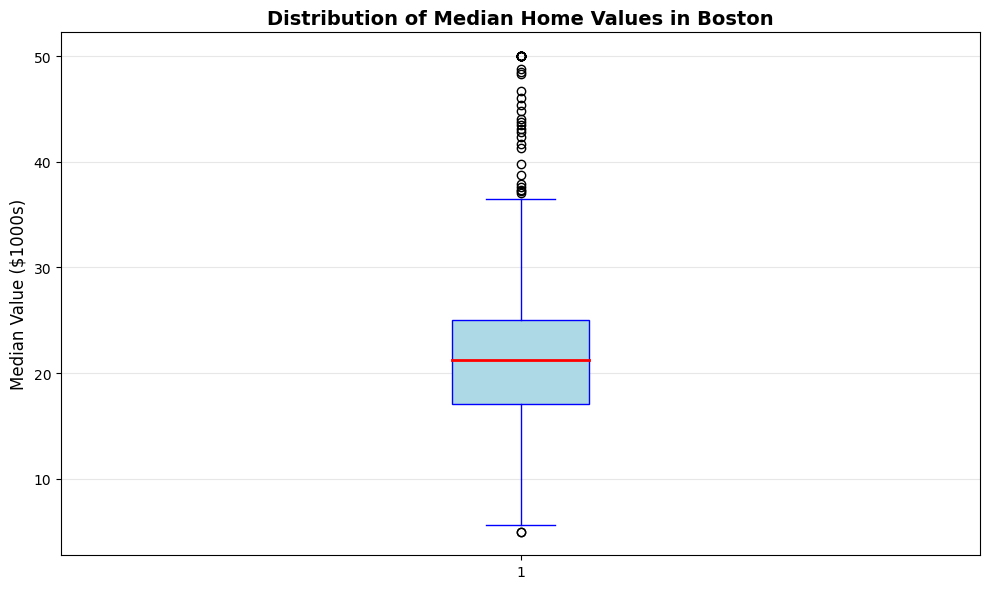


Explanation:
The boxplot shows the distribution of median home values.
• Median (red line): $21.20k
• Mean: $22.53k
• Range: $5.00k to $50.00k
• Interquartile Range (IQR): $17.02k to $25.00k
• The distribution appears right-skewed with some high-value outliers.


In [11]:
# ------------------------------
### 2.1 Boxplot for Median Value of Owner-Occupied Homes (MEDV)
# ------------------------------

plt.figure(figsize=(10, 6))
plt.boxplot(boston_df['MEDV'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))
plt.ylabel('Median Value ($1000s)', fontsize=12)
plt.title('Distribution of Median Home Values in Boston', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nExplanation:")
print("="*60)
print(f"The boxplot shows the distribution of median home values.")
print(f"• Median (red line): ${boston_df['MEDV'].median():.2f}k")
print(f"• Mean: ${boston_df['MEDV'].mean():.2f}k")
print(f"• Range: ${boston_df['MEDV'].min():.2f}k to ${boston_df['MEDV'].max():.2f}k")
print(f"• Interquartile Range (IQR): ${boston_df['MEDV'].quantile(0.25):.2f}k to ${boston_df['MEDV'].quantile(0.75):.2f}k")
print(f"• The distribution appears right-skewed with some high-value outliers.")

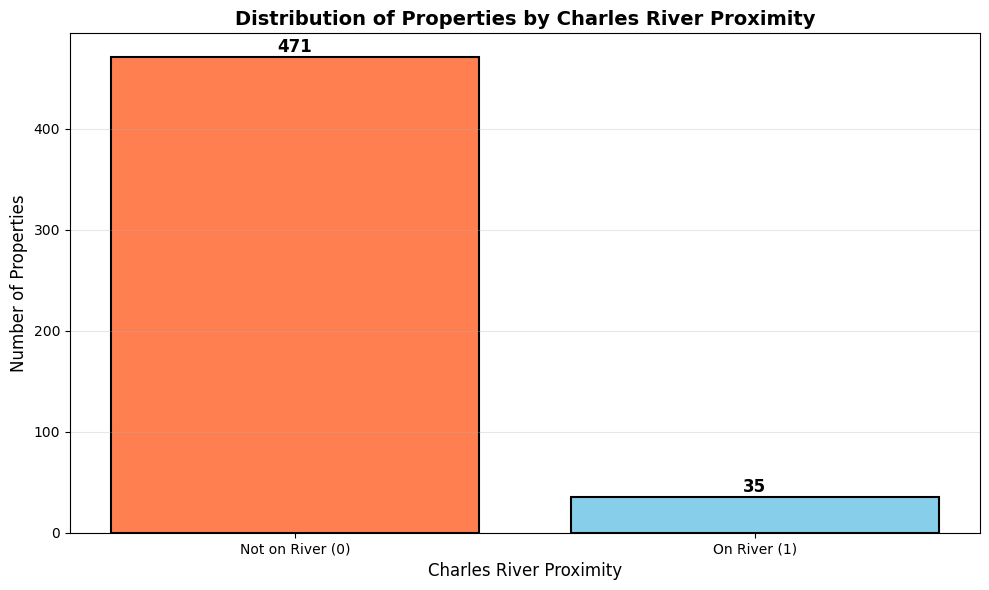


Explanation:
• Properties NOT bounded by Charles River: 471 (93.1%)
• Properties bounded by Charles River: 35 (6.9%)
• The majority of properties are not located on the Charles River.


In [12]:
# 2.2 Bar plot for Charles River Variable (CHAS)
plt.figure(figsize=(10, 6))
chas_counts = boston_df['CHAS'].value_counts()
plt.bar(['Not on River (0)', 'On River (1)'], chas_counts.values, 
        color=['coral', 'skyblue'], edgecolor='black', linewidth=1.5)
plt.xlabel('Charles River Proximity', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.title('Distribution of Properties by Charles River Proximity', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(chas_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nExplanation:")
print("="*60)
print(f"• Properties NOT bounded by Charles River: {chas_counts[0]} ({chas_counts[0]/len(boston_df)*100:.1f}%)")
print(f"• Properties bounded by Charles River: {chas_counts[1]} ({chas_counts[1]/len(boston_df)*100:.1f}%)")
print(f"• The majority of properties are not located on the Charles River.")

Age Group Distribution:
AGE_group
Young (≤35)        91
Medium (35-70)    128
Old (>70)         287
Name: count, dtype: int64



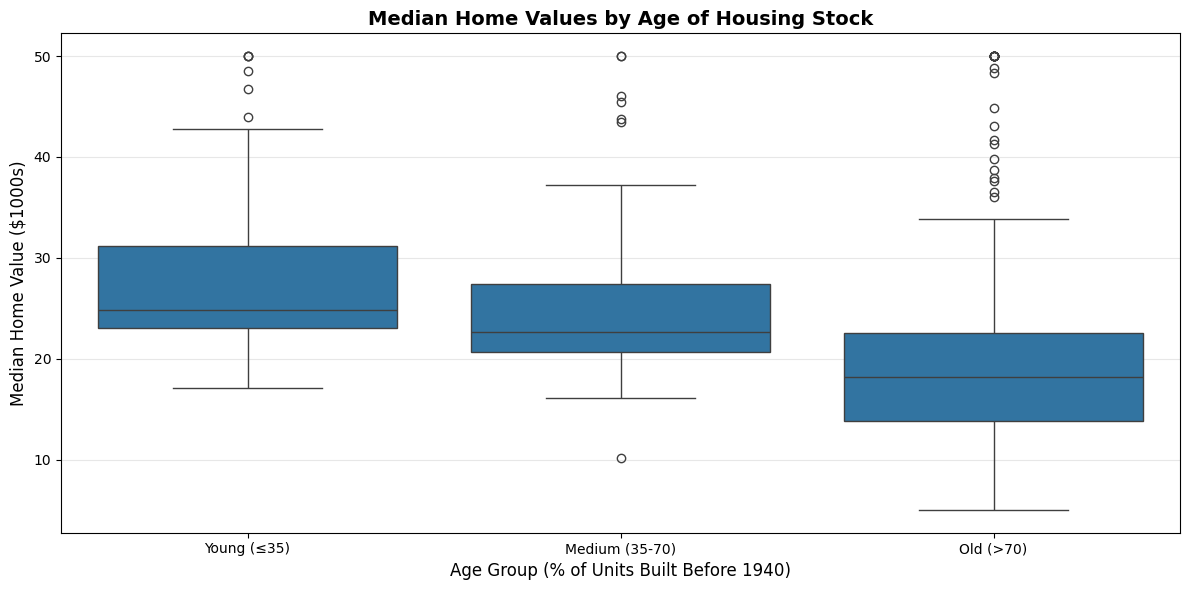


Explanation:

Young (≤35):
  • Median: $24.80k
  • Mean: $27.78k
  • Count: 91 properties

Medium (35-70):
  • Median: $22.60k
  • Mean: $24.95k
  • Count: 128 properties

Old (>70):
  • Median: $18.20k
  • Mean: $19.79k
  • Count: 287 properties

Key Insight: Properties in younger housing stock areas (≤35% old units)
tend to have higher median values compared to areas with predominantly older housing.


In [16]:
# 2.3 Boxplot: MEDV vs AGE groups
bostondf = boston_df.copy()
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], 
                                  bins=[0, 35, 70, 100],
                                  labels=['Young (≤35)', 'Medium (35-70)', 'Old (>70)'])

print("Age Group Distribution:")
print("="*60)
print(boston_df['AGE_group'].value_counts().sort_index())
print()

plt.figure(figsize=(12, 6))
sns.boxplot(data=boston_df, x='AGE_group', y='MEDV')
plt.xlabel('Age Group (% of Units Built Before 1940)', fontsize=12)
plt.ylabel('Median Home Value ($1000s)', fontsize=12)
plt.title('Median Home Values by Age of Housing Stock', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nExplanation:")
print("="*60)
for group in ['Young (≤35)', 'Medium (35-70)', 'Old (>70)']:
    group_data = boston_df[boston_df['AGE_group'] == group]['MEDV']
    print(f"\n{group}:")
    print(f"  • Median: ${group_data.median():.2f}k")
    print(f"  • Mean: ${group_data.mean():.2f}k")
    print(f"  • Count: {len(group_data)} properties")

print("\nKey Insight: Properties in younger housing stock areas (≤35% old units)")
print("tend to have higher median values compared to areas with predominantly older housing.")

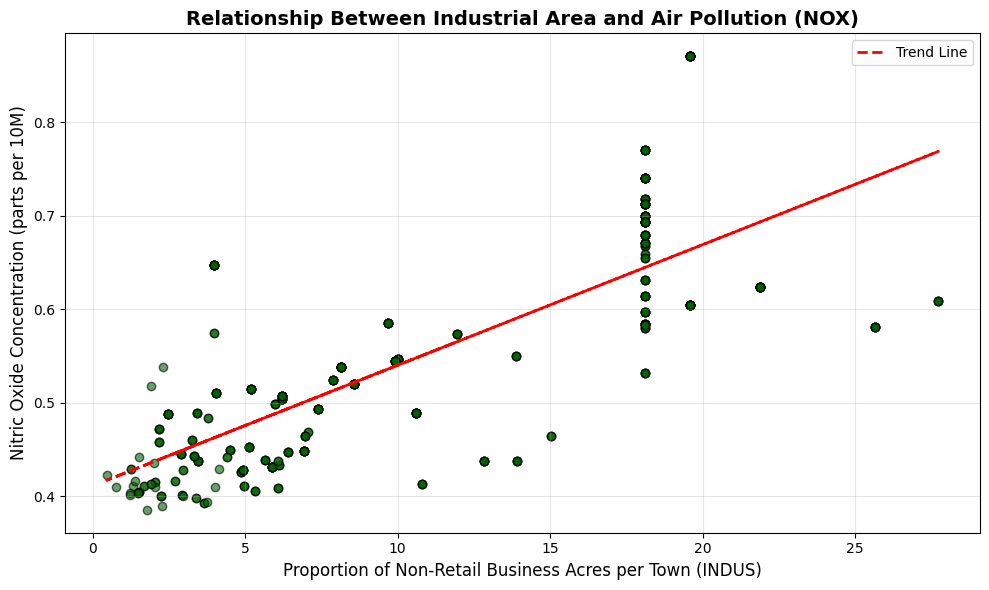


Explanation:
• Correlation coefficient: 0.7637
• Relationship: Strong positive

Interpretation: There is a strong positive linear relationship between the
proportion of industrial/non-retail business areas and nitric oxide pollution.
As industrial activity increases, air pollution (NOX) also increases significantly.


In [19]:
# 2.4 Scatter Plot: NOX vs INDUS
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.6, c='darkgreen', edgecolors='black')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)', fontsize=12)
plt.ylabel('Nitric Oxide Concentration (parts per 10M)', fontsize=12)
plt.title('Relationship Between Industrial Area and Air Pollution (NOX)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(boston_df['INDUS'], boston_df['NOX'], 1)
p = np.poly1d(z)
plt.plot(boston_df['INDUS'], p(boston_df['INDUS']), "r--", linewidth=2, label='Trend Line')
plt.legend()

plt.tight_layout()
plt.show()

print("\nExplanation:")
print("="*60)
corr_coef = boston_df['INDUS'].corr(boston_df['NOX'])
print(f"• Correlation coefficient: {corr_coef:.4f}")
print(f"• Relationship: {'Strong positive' if abs(corr_coef) > 0.7 else 'Moderate positive' if abs(corr_coef) > 0.4 else 'Weak'}")
print(f"\nInterpretation: There is a strong positive linear relationship between the")
print(f"proportion of industrial/non-retail business areas and nitric oxide pollution.")
print(f"As industrial activity increases, air pollution (NOX) also increases significantly.")

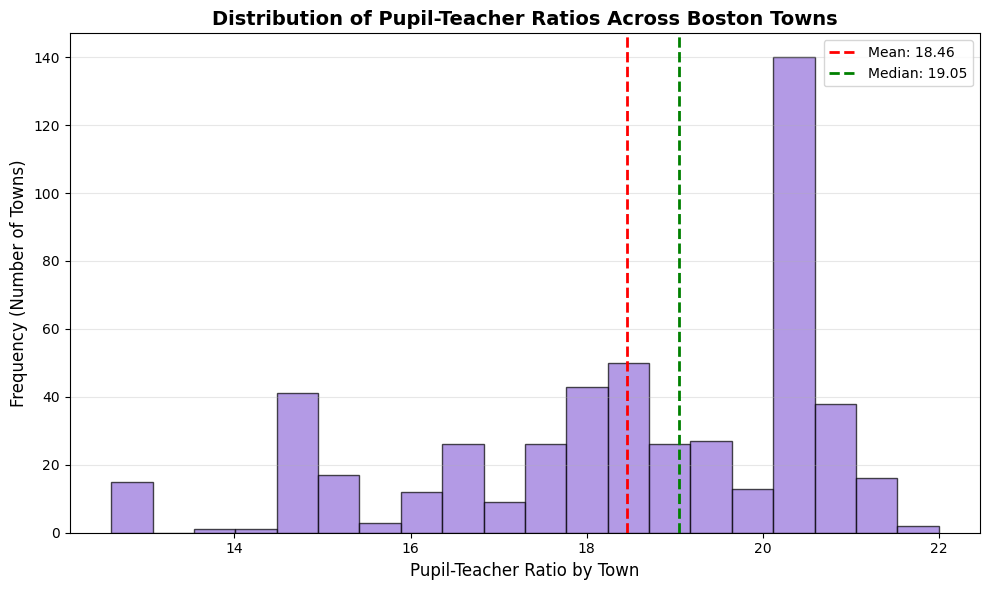


Explanation:
• Mean pupil-teacher ratio: 18.46
• Median pupil-teacher ratio: 19.05
• Standard deviation: 2.16
• Range: 12.60 to 22.00

The distribution shows most towns cluster around a pupil-teacher ratio of 18-20,
with the distribution being relatively concentrated (low variability).


In [20]:
#2.5 Histogram: Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=20, color='mediumpurple', edgecolor='black', alpha=0.7)
plt.xlabel('Pupil-Teacher Ratio by Town', fontsize=12)
plt.ylabel('Frequency (Number of Towns)', fontsize=12)
plt.title('Distribution of Pupil-Teacher Ratios Across Boston Towns', fontsize=14, fontweight='bold')
plt.axvline(boston_df['PTRATIO'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {boston_df["PTRATIO"].mean():.2f}')
plt.axvline(boston_df['PTRATIO'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {boston_df["PTRATIO"].median():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nExplanation:")
print("="*60)
print(f"• Mean pupil-teacher ratio: {boston_df['PTRATIO'].mean():.2f}")
print(f"• Median pupil-teacher ratio: {boston_df['PTRATIO'].median():.2f}")
print(f"• Standard deviation: {boston_df['PTRATIO'].std():.2f}")
print(f"• Range: {boston_df['PTRATIO'].min():.2f} to {boston_df['PTRATIO'].max():.2f}")
print(f"\nThe distribution shows most towns cluster around a pupil-teacher ratio of 18-20,")
print(f"with the distribution being relatively concentrated (low variability).")

In [27]:
# 3.1.1 Is there a significant difference in median value of houses bounded by the Charles River or not?

# Separate data by Charles River proximity
river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Descriptive statistics
print("\n DESCRIPTIVE STATISTICS:")
print("-" * 70)
print(f"Properties ON Charles River (CHAS=1):")
print(f"  • Sample size: {len(river)}")
print(f"  • Mean MEDV: ${river.mean():.2f}k")
print(f"  • Median MEDV: ${river.median():.2f}k")
print(f"  • Std Dev: ${river.std():.2f}k")

print(f"\nProperties NOT on Charles River (CHAS=0):")
print(f"  • Sample size: {len(no_river)}")
print(f"  • Mean MEDV: ${no_river.mean():.2f}k")
print(f"  • Median MEDV: ${no_river.median():.2f}k")
print(f"  • Std Dev: ${no_river.std():.2f}k")

print(f"\nDifference in means: ${river.mean() - no_river.mean():.2f}k")

# Perform independent samples t-test
t_stat, p_val = ttest_ind(river, no_river)

print("\n TEST STATISTICS:")
print("-" * 70)
print(f"Test: Independent Samples T-Test")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.6f}")
print(f"Significance level (α): 0.05")

print("\n DECISION & CONCLUSION:")
print("-" * 70)
if p_val < 0.05:
    print(f"Since p-value ({p_val:.6f}) < α (0.05), we REJECT the null hypothesis.")
    print("\nStatistical Conclusion:")
    print("   There IS a statistically significant difference in median home values")
    print("   between properties on the Charles River and those that are not.")
    print("\nPractical Interpretation for Management:")
    print(f"   • Properties bounded by the Charles River have significantly higher")
    print(f"     median values (${river.mean():.2f}k) compared to properties not on")
    print(f"     the river (${no_river.mean():.2f}k).")
    print(f"   • The difference is approximately ${river.mean() - no_river.mean():.2f}k per property.")
    print(f"   • River proximity is a valuable amenity that commands a premium in the market.")
else:
    print(f"Since p-value ({p_val:.6f}) ≥ α (0.05), we FAIL TO REJECT the null hypothesis.")
    print("\nConclusion: There is no statistically significant difference in median")
    print("home values based on Charles River proximity.")

print("="*70)



 DESCRIPTIVE STATISTICS:
----------------------------------------------------------------------
Properties ON Charles River (CHAS=1):
  • Sample size: 35
  • Mean MEDV: $28.44k
  • Median MEDV: $23.30k
  • Std Dev: $11.82k

Properties NOT on Charles River (CHAS=0):
  • Sample size: 471
  • Mean MEDV: $22.09k
  • Median MEDV: $20.90k
  • Std Dev: $8.83k

Difference in means: $6.35k

 TEST STATISTICS:
----------------------------------------------------------------------
Test: Independent Samples T-Test
t-statistic: 3.9964
p-value: 0.000074
Significance level (α): 0.05

 DECISION & CONCLUSION:
----------------------------------------------------------------------
Since p-value (0.000074) < α (0.05), we REJECT the null hypothesis.

Statistical Conclusion:
   There IS a statistically significant difference in median home values
   between properties on the Charles River and those that are not.

Practical Interpretation for Management:
   • Properties bounded by the Charles River have sign

In [29]:
# 3.2 Is there a difference in median values of houses for each proportion of owner-occupied units built prior to 1940?
print("\n" + "="*70)
print("QUESTION 2: HOUSING AGE IMPACT ON MEDIAN HOME VALUES")
print("="*70)

print("\n HYPOTHESES:")
print("-" * 70)
print("H₀ (Null Hypothesis):")
print("    There is NO significant difference in median home values across")
print("    different age groups (Young, Medium, Old housing stock).")
print("    (μ_young = μ_medium = μ_old)")
print("\nH₁ (Alternative Hypothesis):")
print("    At least one age group has a significantly different median home value.")
print("    (At least one μ is different)")
print("\nSignificance Level: α = 0.05")
print("="*70)

# Separate data by age groups
young = boston_df[boston_df['AGE_group'] == 'Young (≤35)']['MEDV']
medium = boston_df[boston_df['AGE_group'] == 'Medium (35-70)']['MEDV']
old = boston_df[boston_df['AGE_group'] == 'Old (>70)']['MEDV']

print("\n DESCRIPTIVE STATISTICS BY AGE GROUP:")
print("-" * 70)
for name, group in [('Young (≤35% old)', young), ('Medium (35-70% old)', medium), ('Old (>70% old)', old)]:
    print(f"\n{name}:")
    print(f"  • Sample size: {len(group)}")
    print(f"  • Mean MEDV: ${group.mean():.2f}k")
    print(f"  • Median MEDV: ${group.median():.2f}k")
    print(f"  • Std Dev: ${group.std():.2f}k")

# Perform one-way ANOVA
f_stat, p_val = f_oneway(young, medium, old)

print("\n TEST STATISTICS:")
print("-" * 70)
print(f"Test: One-Way ANOVA (Analysis of Variance)")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.10f}")
print(f"Significance level (α): 0.05")

print("\n DECISION & CONCLUSION:")
print("-" * 70)
if p_val < 0.05:
    print(f"Since p-value ({p_val:.10f}) < α (0.05), we REJECT the null hypothesis.")
    print("\nStatistical Conclusion:")
    print("   There IS a statistically significant difference in median home values")
    print("   across the different age groups of housing stock.")
    print("\nPractical Interpretation for Management:")
    print(f"   • Young housing areas (≤35% old): Mean = ${young.mean():.2f}k")
    print(f"   • Medium housing areas (35-70% old): Mean = ${medium.mean():.2f}k")
    print(f"   • Old housing areas (>70% old): Mean = ${old.mean():.2f}k")
    print(f"\n   Key Insight: Areas with younger housing stock (fewer old buildings)")
    print(f"   command significantly higher home values. This suggests that housing")
    print(f"   age is an important factor in property valuation.")
else:
    print(f"Since p-value ({p_val:.6f}) ≥ α (0.05), we FAIL TO REJECT the null hypothesis.")
    print("\nConclusion: There is no statistically significant difference in median")
    print("home values across different age groups.")

print("="*70)


QUESTION 2: HOUSING AGE IMPACT ON MEDIAN HOME VALUES

 HYPOTHESES:
----------------------------------------------------------------------
H₀ (Null Hypothesis):
    There is NO significant difference in median home values across
    different age groups (Young, Medium, Old housing stock).
    (μ_young = μ_medium = μ_old)

H₁ (Alternative Hypothesis):
    At least one age group has a significantly different median home value.
    (At least one μ is different)

Significance Level: α = 0.05

 DESCRIPTIVE STATISTICS BY AGE GROUP:
----------------------------------------------------------------------

Young (≤35% old):
  • Sample size: 91
  • Mean MEDV: $27.78k
  • Median MEDV: $24.80k
  • Std Dev: $7.64k

Medium (35-70% old):
  • Sample size: 128
  • Mean MEDV: $24.95k
  • Median MEDV: $22.60k
  • Std Dev: $6.97k

Old (>70% old):
  • Sample size: 287
  • Mean MEDV: $19.79k
  • Median MEDV: $18.20k
  • Std Dev: $9.52k

 TEST STATISTICS:
------------------------------------------------------

In [30]:
# 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
print("\n" + "="*70)
print("QUESTION 3: RELATIONSHIP BETWEEN NOX AND INDUSTRIAL AREAS")
print("="*70)

print("\n HYPOTHESES:")
print("-" * 70)
print("H₀ (Null Hypothesis):")
print("    There is NO linear relationship between NOX concentrations and")
print("    the proportion of non-retail business acres (INDUS).")
print("    (ρ = 0, where ρ is the population correlation coefficient)")
print("\nH₁ (Alternative Hypothesis):")
print("    There IS a linear relationship between NOX concentrations and")
print("    the proportion of non-retail business acres (INDUS).")
print("    (ρ ≠ 0)")
print("\nSignificance Level: α = 0.05")
print("="*70)

# Calculate Pearson correlation
corr, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("\n TEST STATISTICS:")
print("-" * 70)
print(f"Test: Pearson Correlation Coefficient")
print(f"Correlation coefficient (r): {corr:.4f}")
print(f"p-value: {p_val:.15f}")
print(f"Significance level (α): 0.05")

print("\n📊 CORRELATION STRENGTH INTERPRETATION:")
print("-" * 70)
if abs(corr) >= 0.7:
    strength = "Strong"
elif abs(corr) >= 0.4:
    strength = "Moderate"
else:
    strength = "Weak"

direction = "positive" if corr > 0 else "negative"
print(f"The correlation is {strength} and {direction}.")
print(f"Interpretation: r = {corr:.4f} indicates a {strength.lower()} {direction}")
print(f"linear relationship between the two variables.")

print("\n DECISION & CONCLUSION:")
print("-" * 70)
if p_val < 0.05:
    print(f"Since p-value ({p_val:.15f}) < α (0.05), we REJECT the null hypothesis.")
    print("\n Statistical Conclusion:")
    print("   We CANNOT conclude that there is no relationship. In fact, there IS")
    print("   a statistically significant linear relationship between NOX and INDUS.")
    print("\n Practical Interpretation for Management:")
    print(f"   • Correlation coefficient: r = {corr:.4f}")
    print(f"   • This indicates a STRONG POSITIVE relationship.")
    print(f"   • As the proportion of industrial/non-retail business areas increases,")
    print(f"     nitric oxide pollution (NOX) also increases significantly.")
    print(f"   • Approximately {(corr**2)*100:.1f}% of the variance in NOX levels can")
    print(f"     be explained by the proportion of industrial land use.")
    print(f"\n   Policy Implication: Industrial zoning decisions have substantial")
    print(f"   environmental consequences for air quality in the surrounding areas.")
else:
    print(f"Since p-value ({p_val:.6f}) ≥ α (0.05), we FAIL TO REJECT the null hypothesis.")
    print("\nConclusion: We can conclude that there is no significant linear")
    print("relationship between NOX concentrations and industrial areas.")

print("="*70)


QUESTION 3: RELATIONSHIP BETWEEN NOX AND INDUSTRIAL AREAS

 HYPOTHESES:
----------------------------------------------------------------------
H₀ (Null Hypothesis):
    There is NO linear relationship between NOX concentrations and
    the proportion of non-retail business acres (INDUS).
    (ρ = 0, where ρ is the population correlation coefficient)

H₁ (Alternative Hypothesis):
    There IS a linear relationship between NOX concentrations and
    the proportion of non-retail business acres (INDUS).
    (ρ ≠ 0)

Significance Level: α = 0.05

 TEST STATISTICS:
----------------------------------------------------------------------
Test: Pearson Correlation Coefficient
Correlation coefficient (r): 0.7637
p-value: 0.000000000000000
Significance level (α): 0.05

📊 CORRELATION STRENGTH INTERPRETATION:
----------------------------------------------------------------------
The correlation is Strong and positive.
Interpretation: r = 0.7637 indicates a strong positive
linear relationship betwee

In [33]:
# 3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
print("\n" + "="*70)
print("QUESTION 4: IMPACT OF DISTANCE TO EMPLOYMENT CENTERS ON HOME VALUES")
print("="*70)

print("\n HYPOTHESES:")
print("-" * 70)
print("H₀ (Null Hypothesis):")
print("    The weighted distance to employment centers (DIS) has NO significant")
print("    impact on median home values (MEDV).")
print("    (β₁ = 0, where β₁ is the regression coefficient for DIS)")
print("\nH₁ (Alternative Hypothesis):")
print("    The weighted distance to employment centers (DIS) HAS a significant")
print("    impact on median home values (MEDV).")
print("    (β₁ ≠ 0)")
print("\nSignificance Level: α = 0.05")
print("="*70)

# Prepare data for regression
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # adds intercept term

# Fit the regression model
model = sm.OLS(y, X).fit()

print("\n REGRESSION ANALYSIS RESULTS:")
print("-" * 70)
print(model.summary())

# Extract key statistics
coef_dis = model.params['DIS']
p_value_dis = model.pvalues['DIS']
intercept = model.params['const']
r_squared = model.rsquared

print("\n\n KEY REGRESSION STATISTICS:")
print("="*70)
print(f"Regression Equation: MEDV = {intercept:.4f} + {coef_dis:.4f} × DIS")
print("-" * 70)
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Slope Coefficient (β₁): {coef_dis:.4f}")
print(f"p-value for DIS: {p_value_dis:.10f}")
print(f"R-squared: {r_squared:.4f} ({r_squared*100:.2f}% of variance explained)")
print(f"Significance level (α): 0.05")

print("\n DECISION & CONCLUSION:")
print("="*70)
if p_value_dis < 0.05:
    print(f"Since p-value ({p_value_dis:.10f}) < α (0.05), we REJECT the null hypothesis.")
    print("\n Statistical Conclusion:")
    print("   The weighted distance to employment centers (DIS) HAS a statistically")
    print("   significant impact on median home values.")
    print("\n PRACTICAL INTERPRETATION FOR MANAGEMENT:")
    print("="*70)
    print(f"\n COEFFICIENT INTERPRETATION:")
    print(f"   • Regression Coefficient (β₁): {coef_dis:.4f}")
    print(f"\n   ➤ For every 1-unit increase in weighted distance to employment centers,")
    print(f"     the median home value increases by ${coef_dis:.4f} thousand.")
    print(f"\n   ➤ In practical terms: Moving 1 unit farther from employment centers")
    print(f"     is associated with an increase of approximately ${coef_dis * 1000:.2f}")
    print(f"     in median home value.")
    print(f"\n KEY INSIGHTS:")
    print("-" * 70)
    if coef_dis > 0:
        print("   • POSITIVE relationship: Homes FARTHER from employment centers have")
        print("     HIGHER median values.")
        print("\n   • Possible explanations:")
        print("     - Homes farther from employment centers may be in more suburban,")
        print("       quieter, or more spacious areas")
        print("     - Distance from city centers may correlate with larger lots,")
        print("       newer construction, or better schools")
        print("     - Less urban density and congestion in distant areas")
    else:
        print("   • NEGATIVE relationship: Homes CLOSER to employment centers have")
        print("     HIGHER median values.")
        print("\n   • This suggests proximity to employment is a valued amenity.")
    
    print(f"\n   • The model explains {r_squared*100:.2f}% of the variance in home values,")
    print(f"     indicating that other factors also play important roles.")
    
    print("\n RECOMMENDATION FOR MANAGEMENT:")
    print("-" * 70)
    print("   When evaluating property investments or development opportunities,")
    print(f"   consider that distance to employment centers is a statistically")
    print(f"   significant factor in home valuation. However, with R² = {r_squared:.4f},")
    print(f"   management should also consider other important variables in the model.")
else:
    print(f"Since p-value ({p_value_dis:.6f}) ≥ α (0.05), we FAIL TO REJECT the null hypothesis.")
    print("\nConclusion: The weighted distance to employment centers does NOT have")
    print("a statistically significant impact on median home values.")

print("\n" + "="*70)


QUESTION 4: IMPACT OF DISTANCE TO EMPLOYMENT CENTERS ON HOME VALUES

 HYPOTHESES:
----------------------------------------------------------------------
H₀ (Null Hypothesis):
    The weighted distance to employment centers (DIS) has NO significant
    impact on median home values (MEDV).
    (β₁ = 0, where β₁ is the regression coefficient for DIS)

H₁ (Alternative Hypothesis):
    The weighted distance to employment centers (DIS) HAS a significant
    impact on median home values (MEDV).
    (β₁ ≠ 0)

Significance Level: α = 0.05

 REGRESSION ANALYSIS RESULTS:
----------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 18 Nov 2025   Prob 